In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import os
import re
import glob
import pandas as pd
import librosa

import numpy as np
from tqdm import tqdm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import random
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import math

In [9]:
audio_file_path="/content/drive/MyDrive/FYP 2023/Dataset/female_Hyperfunktionelle_Dysphonie/1037-a_h.wav"
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

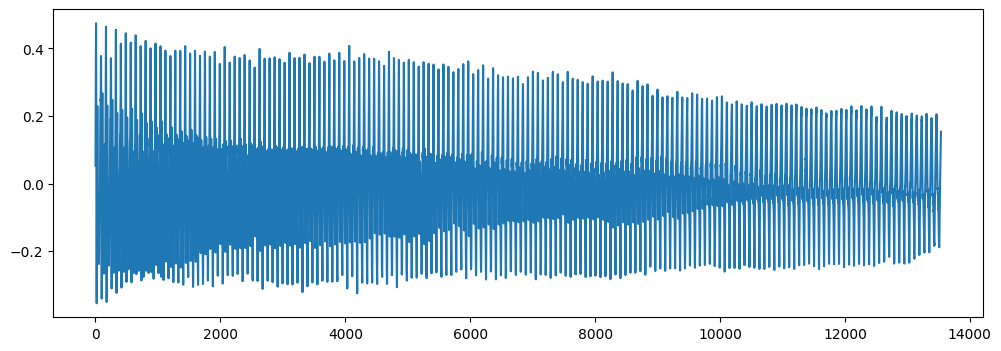

In [10]:
###plot the librosa audio data
# Original audio with 1 channel
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [11]:
from sklearn.preprocessing import StandardScaler
def features_extractor_lpcc(file_name):
    audio, sample_rate = librosa.load(file_name)
    lpc_coefficients = librosa.lpc(audio, order=12)
    epsilon = 1e-10
    powerspectrum = np.abs(np.fft.fft(lpc_coefficients)) ** 2
    lpc_coefficients_offset = np.maximum(powerspectrum, epsilon)
    lpcc_features = np.fft.irfft(np.log(lpc_coefficients_offset))
    return lpcc_features

In [12]:
lpcc = features_extractor_lpcc(audio_file_path)
print(lpcc)

[ 0.75728234 -0.58179898 -1.51731968 -0.16540426 -0.42096893 -0.21073785
 -0.34440479 -0.17862129 -0.30192544 -0.06836431 -0.22716163 -0.06079651
 -0.21095387 -0.06079651 -0.22716163 -0.06836431 -0.30192544 -0.17862129
 -0.34440479 -0.21073785 -0.42096893 -0.16540426 -1.51731968 -0.58179898]


In [13]:
disphonie = 0
laryn = 0
heal = 0
def features_extractor_currect_folder(foldername,label):
  global disphonie, laryn, heal
  label_feature=[]
  for filename in tqdm(glob.glob(foldername+'/*.wav')):
    if label == 0:
      heal += 1
    elif label == 1:
      disphonie +=1
    elif label == 2:
      laryn += 1
    data=features_extractor_lpcc(filename)
    label_feature.append([data,label])
    # print((label_feature))
  return label_feature

In [15]:
hyper_disphonie = []
laryngitis = []
healthy = []
label_features = []
folder_path='/content/drive/MyDrive/FYP 2023/Dataset'
folders_labels = [
    (
        flder,
        0 if 'healthy' in flder[len(folder_path):] else
        1 if 'Dysphonie' in flder[len(folder_path):] else
        2 if 'laryngitis' in flder[len(folder_path):] else -1  # Default label if none match
    )
    for flder in glob.glob(folder_path + '/*')
]
# print(folders_labels)
import numpy as np
from scipy.stats import skew

def lpcc_skewness(foldername, label):
    lpcc_skewness = []
    for filename in tqdm(glob.glob(foldername + '/*.wav')):
        audio, sample_rate = librosa.load(filename)

        # mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        # mfccs_features = transformation(mfccs_features)
        # print(mfccs_features)
        lpc_coefficients = librosa.lpc(audio, order=12)
        epsilon = 1e-10
        powerspectrum = np.abs(np.fft.fft(lpc_coefficients)) ** 2
        lpc_coefficients_offset = np.maximum(powerspectrum, epsilon)
        lpcc_features = np.fft.irfft(np.log(lpc_coefficients_offset))
        # print(lpcc_features)
        # scaler = StandardScaler()
        # lpcc_features = lpcc_features[:, None]
      # print(lpcc_features.shape)
        # lpcc_features = scaler.fit_transform(lpcc_features)

        lpcc_skewness.append(skew(lpcc_features, axis=None))
    return np.mean(lpcc_skewness)

skewness_dict = {}


for folder , label in (folders_labels):
  skewness = lpcc_skewness(folder, label)
  skewness_dict[label] = skewness
  print(skewness)
  label_features.extend(features_extractor_currect_folder(folder,label))
print(label_features)


  # break

100%|██████████| 533/533 [00:25<00:00, 21.16it/s]


-0.31220453440106744


100%|██████████| 299/299 [00:09<00:00, 30.53it/s]


-0.47027200176470246


100%|██████████| 533/533 [00:26<00:00, 20.23it/s]


-0.7121148230685967


100%|██████████| 533/533 [00:39<00:00, 13.45it/s]


-0.6867181316093302


100%|██████████| 533/533 [00:23<00:00, 22.60it/s]


-0.2772982877648782


100%|██████████| 448/448 [00:17<00:00, 25.57it/s]


-1.0456104600818288


100%|██████████| 448/448 [00:09<00:00, 49.21it/s]


[[array([ 0.3884131 , -0.35073779, -1.10860913,  0.03579935,  0.06968435,
       -0.31493755, -0.4006974 ,  0.14483023,  0.01016807, -0.37121395,
       -0.17379581, -0.45323267, -0.21824873, -0.45323267, -0.17379581,
       -0.37121395,  0.01016807,  0.14483023, -0.4006974 , -0.31493755,
        0.06968435,  0.03579935, -1.10860913, -0.35073779]), 1], [array([ 0.68567641, -0.63696895, -1.6029307 , -0.19834941, -0.42625703,
       -0.28792356, -0.42940217, -0.12610949, -0.19653228, -0.58893266,
       -0.41949971,  0.16602418, -0.27870998,  0.16602418, -0.41949971,
       -0.58893266, -0.19653228, -0.12610949, -0.42940217, -0.28792356,
       -0.42625703, -0.19834941, -1.6029307 , -0.63696895]), 1], [array([ 0.66683384, -0.6134213 , -1.32243503, -0.35305582, -0.79665481,
       -0.10270296, -0.36199335, -0.1000729 , -0.22412681, -0.29001681,
       -0.26722673, -0.61465118, -0.3456535 , -0.61465118, -0.26722673,
       -0.29001681, -0.22412681, -0.1000729 , -0.36199335, -0.10270296,
  

In [16]:
print(heal, laryn, disphonie)

981 832 1599


In [17]:
label_features_df=pd.DataFrame(label_features,columns=['feature','class'])
label_features_df.tail()

,feature,class
2874,"[0.3971747304435383, -0.7682557422114833, -2.0...",0
2875,"[0.7579217493783557, -0.5862744302107978, -0.7...",0
2876,"[16.328916913574766, -0.8459395325590546, -1.7...",0
2877,"[0.7472099707718473, -0.6781294167877993, -2.0...",0
2878,"[0.5083898043524024, -0.6897151873711183, -1.2...",0


In [ ]:
path = "/content/drive/MyDrive/sbvoiceDataset/"

label_features_df.to_json(path+'processed_data_lpcc.json')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming label_features_df contains your data
healthy_data = label_features_df[label_features_df['class'] == 0]['feature'].tolist()
dysphonie_data = label_features_df[label_features_df['class'] == 1]['feature'].tolist()
laryngitis_data = label_features_df[label_features_df['class'] == 2]['feature'].tolist()

# Plotting the MFCC features using KDE
plt.figure(figsize=(20, 12))

for idx, data in enumerate([healthy_data, dysphonie_data, laryngitis_data]):
    for i in range(len(data[0])):
        sns.kdeplot(np.array(data)[:, i], label=f'Class {idx}, Feature {i}')

plt.title('Distribution of MFCC Features')
plt.xlabel('MFCC Values')
plt.ylabel('Density')
plt.legend()
plt.show()


In [ ]:
path = '/content/drive/MyDrive/sbvoiceAUG_Dataset/processed_data_multiclass_with_gender_age.json'
# label_features_df_saved=pd.read_json(path+'processed_data_lpcc.json')
label_features_df_saved=pd.read_json(path)
label_features_df_saved.tail()

X=np.array(label_features_df['feature'].tolist())
Y=np.array(label_features_df['class'].tolist())

# print(Y)
# X.reshape(2879,1)
print(X.shape,Y.shape)
# implementing train-test-split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=60)
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

In [ ]:

# ############   Start from here ###############


# # path = "/content/drive/MyDrive/sbvoiceDataset/"
# path = '/content/drive/MyDrive/sbvoiceDataset/processed_data_lpcc.json'
# # label_features_df_saved=pd.read_json(path+'processed_data_lpcc.json')
# label_features_df_saved=pd.read_json(path)
# label_features_df_saved.tail()

# X=np.array(label_features_df_saved['feature'].tolist())
# Y=np.array(label_features_df_saved['class'].tolist())
# print(X.shape, Y.shape)
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=60)
# print(X_train.shape,X_test.shape)
# print(Y_train.shape,Y_test.shape)

In [18]:
X_lpcc=np.array(label_features_df['feature'].tolist())
Y_lpcc=np.array(label_features_df['class'].tolist())
# Y_lpcc=Y_lpcc.reshape((-1,1))

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# # Standardize the data
scaler = StandardScaler()
X_lpcc_scaled = scaler.fit_transform(X_lpcc)
# X_test_scaled = scaler.transform(X_test)

print(len(X_lpcc_scaled[0]))
# # Perform PCA
pca = PCA(n_components=0.988)  # Choose the number of components that explain 95% of the variance
X_lm = pca.fit_transform(X_lpcc_scaled)
# X_test_lm = pca.transform(X_test_scaled)

print(len(X_lm[0]))
# implementing train-test-split
X_train, X_test, Y_train, Y_test = train_test_split(X_lm, Y_lpcc, test_size=0.2, random_state=60)
# Y_train, Y_test = to_categorical(Y_train), to_categorical(Y_test)
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

24
7
(2303, 7) (576, 7)
(2303,) (576,)


In [19]:
clf1 = RandomForestClassifier(n_estimators = 20, criterion="gini", oob_score=True, max_features= "sqrt", random_state=100)
clf1.fit(X_train, Y_train)
y_pred = clf1.predict(X_test)
print()
print(clf1.oob_score_)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(Y_test, y_pred))
tree_depths = [estimator.tree_.max_depth for estimator in clf1.estimators_]

# # Print depths of each tree
# for i, depth in enumerate(tree_depths, start=1):
#     print(f"Tree {i} depth: {depth}")



0.43899261832392533
ACCURACY OF THE MODEL:  0.515625


In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(clf1, X_train, Y_train, cv=5)
print(cv_results)

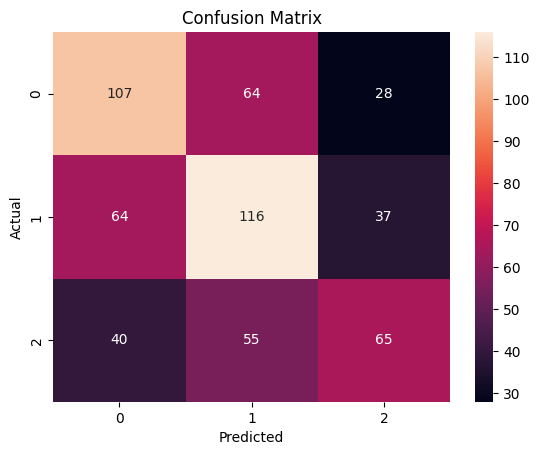



Precision: 0.5002420086719774
Recall: 0.49283355139754076
Accuracy: 0.5


In [20]:
clf1 = RandomForestClassifier(n_estimators = 100, criterion="gini", oob_score=True, max_features= "sqrt", random_state=33)
clf1.fit(X_train, Y_train)
y_pred = clf1.predict(X_test)
print()
# print(clf1.oob_score_)
# print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(Y_test, y_pred))
tree_depths = [estimator.tree_.max_depth for estimator in clf1.estimators_]

# # Print depths of each tree
# for i, depth in enumerate(tree_depths, start=1):
#     print(f"Tree {i} depth: {depth}")


from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import precision_score, recall_score, accuracy_score
# Calculate precision, recall, and accuracy
precision = precision_score(Y_test, y_pred, average='macro')
recall = recall_score(Y_test, y_pred, average='macro')
accuracy = accuracy_score(Y_test, y_pred)

# Print the results

print("\n")
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)